# Loading Fashion-mnist Dataset 

In [93]:
import sys
sys.path.append('e:/hcmus/5th-semester/pattern-recognition/prml-lab/PRML-Lab01-classification-with-machine-learning/utils')

import mnist_reader

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

# Data Processing and Exploratory Data Analysis

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Explore Data Characteristics

In [95]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"Type of X_train: {type(X_train)}")
print(f"Type of y_train: {type(y_train)}")
print(f"Type of X_test: {type(X_test)}")
print(f"Type of X_test: {type(X_test)}")

print(f"Data type of X_train: {X_train.dtype}")
print(f"Data type of y_train: {y_train.dtype}")

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)
Type of X_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>
Type of X_test: <class 'numpy.ndarray'>
Type of X_test: <class 'numpy.ndarray'>
Data type of X_train: uint8
Data type of y_train: uint8


In [96]:
unique, counts = np.unique(y_train, return_counts=True)
print(f'Label distribution: {dict(zip(unique, counts))}')

Label distribution: {np.uint8(0): np.int64(6000), np.uint8(1): np.int64(6000), np.uint8(2): np.int64(6000), np.uint8(3): np.int64(6000), np.uint8(4): np.int64(6000), np.uint8(5): np.int64(6000), np.uint8(6): np.int64(6000), np.uint8(7): np.int64(6000), np.uint8(8): np.int64(6000), np.uint8(9): np.int64(6000)}


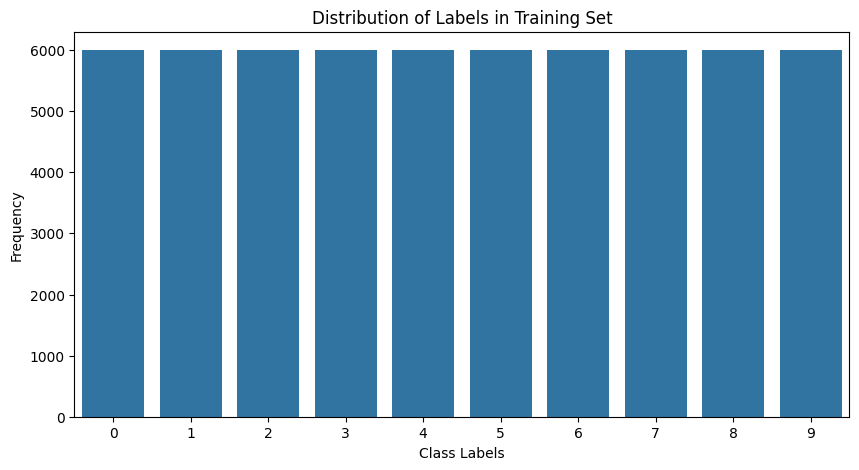

In [97]:
y_train_df = pd.DataFrame(y_train, columns=['Labels'])

plt.figure(figsize=(10, 5))
sns.countplot(x='Labels', data=y_train_df)
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.show()

### 2. Show sample image

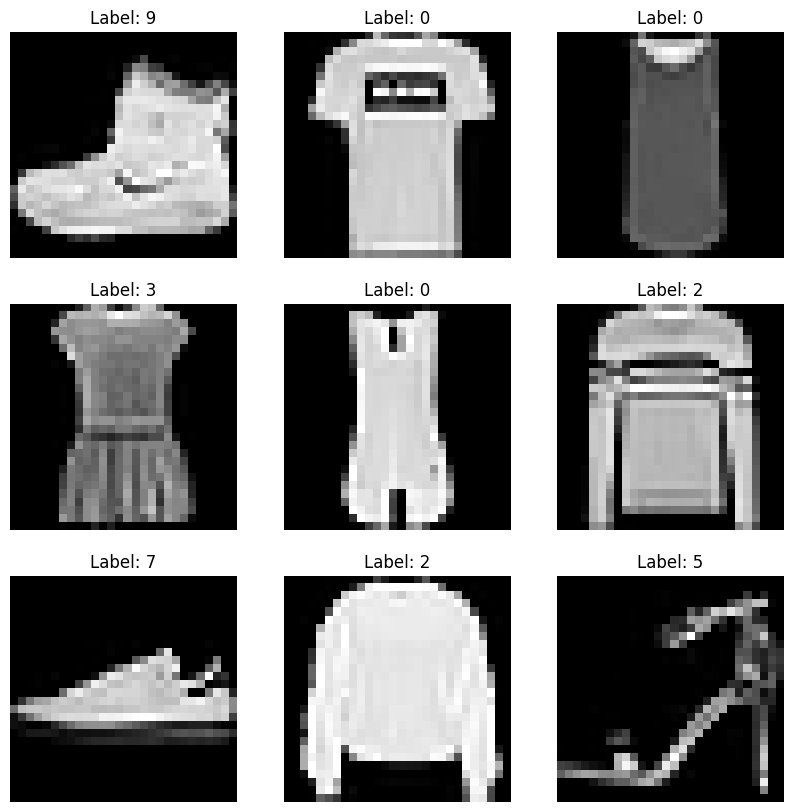

In [98]:
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

### 3. Handle Missing Data

In [99]:
print(f'Number of NaNs in training data: {np.isnan(X_train).sum()}')
print(f'Number of NaNs in testing data: {np.isnan(X_test).sum()}')

Number of NaNs in training data: 0
Number of NaNs in testing data: 0


### 4. Perform Data Transformation

In [100]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [101]:
print("Image dimensions in X_train:", X_train.shape[1:])

Image dimensions in X_train: (784,)


In [102]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

### 6. Pixel value distribution

Mean pixel value: 0.28604018688201904
Standard deviation: 0.353023886680603


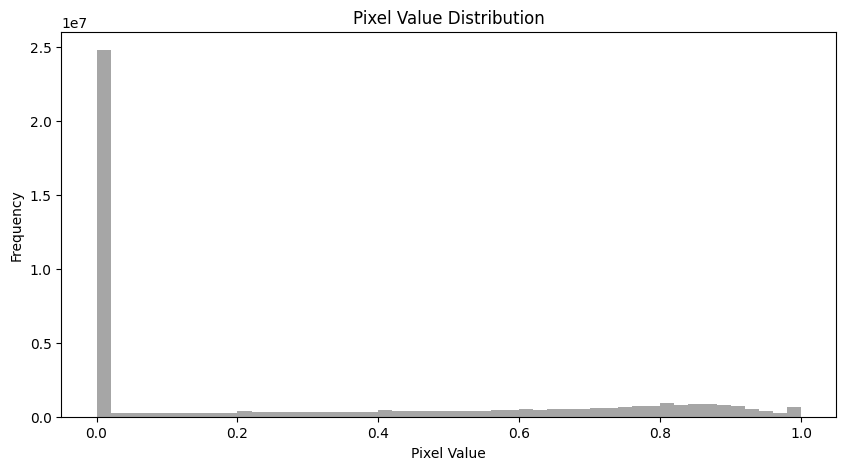

In [103]:
print(f'Mean pixel value: {X_train.mean()}')
print(f'Standard deviation: {X_train.std()}')

plt.figure(figsize=(10, 5))
plt.hist(X_train.flatten(), bins=50, color='gray', alpha=0.7)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


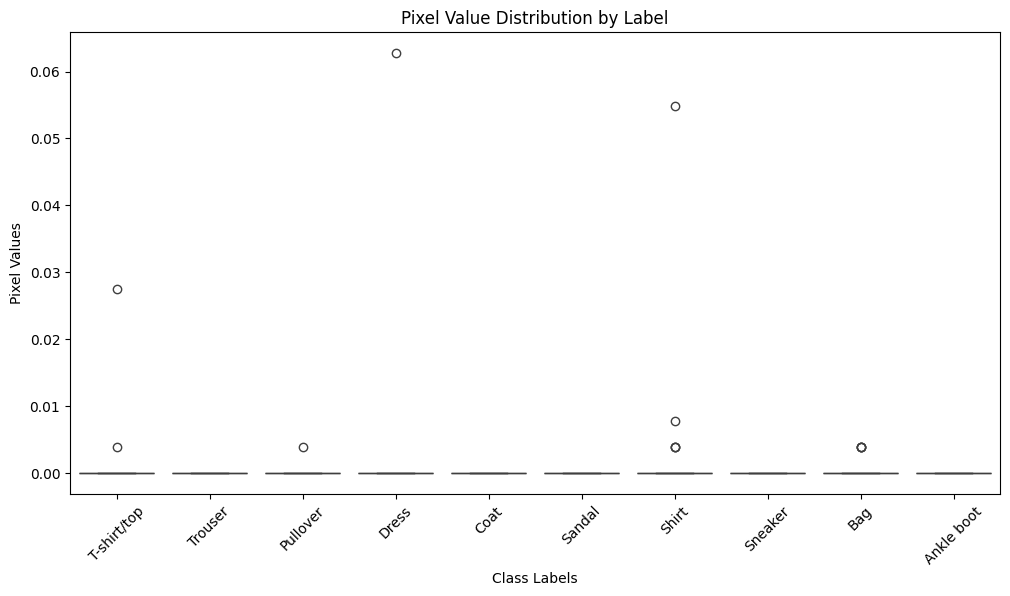

In [104]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
df = pd.DataFrame(X_train_flat)
df['label'] = y_train

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='label', y=df.columns[0])
plt.title('Pixel Value Distribution by Label')
plt.xlabel('Class Labels')
plt.ylabel('Pixel Values')
plt.xticks(ticks=np.arange(10), labels=classes, rotation=45)
plt.show()


### 7. Handling Outlier

In [105]:
# Z-score
z_scores = np.abs(stats.zscore(X_train.reshape(X_train.shape[0], -1)))
outliers_z = np.where(z_scores > 3)

# IQR
Q1 = np.percentile(X_train, 25)
Q3 = np.percentile(X_train, 75)
IQR = Q3 - Q1
outliers_iqr = X_train[(X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))]

print(f'Number of outliers detected using Z-score: {len(outliers_z[0])}')
print(f'Number of outliers detected using IQR: {np.count_nonzero(outliers_iqr)}')


Number of outliers detected using Z-score: 351722
Number of outliers detected using IQR: 0


# Dataset Division

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f'Train set shape: {X_train.shape}, Train labels shape: {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, Validation labels shape: {y_val.shape}')


Train set shape: (48000, 28, 28, 1), Train labels shape: (48000,)
Validation set shape: (12000, 28, 28, 1), Validation labels shape: (12000,)
